In [459]:
import pandas as pd
from scipy import stats
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import math

%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [423]:
tour_df = pd.read_excel("4월_광주_데이터.xlsx", sheet_name="08.내외국인 관광객 날씨별 체류시간")
trafiic_df = pd.read_excel("4월_광주_데이터.xlsx", sheet_name="02.날짜별 승차이용객", index_col=0).T

In [424]:
tour_df.head()

,구분,총 관광객수,내국인 관광객수,외국인 관광객수,평균 체류시간(분),날씨,기온,강수량
0,2021년 04월 30일,3098,3098,0,151,구름,12℃ ~ 18℃,0㎜
1,2021년 04월 29일,2209,2209,0,162,구름,14℃ ~ 22℃,0㎜
2,2021년 04월 28일,2503,2503,0,150,구름,15℃ ~ 22℃,0㎜
3,2021년 04월 27일,2387,2387,0,153,구름,12℃ ~ 21℃,0㎜
4,2021년 04월 26일,1754,1754,0,186,구름,13℃ ~ 23℃,0㎜


In [425]:
trafiic_df.head()

,요일,교통수단,일반버스,마을버스,도시철도
01일,목,승차이용객수,280365,15478,36299
02일,금,승차이용객수,293346,16455,38520
03일,토,승차이용객수,164474,8113,21110
04일,일,승차이용객수,125871,4652,15849
05일,월,승차이용객수,282784,15189,36047


In [426]:
tour_df.set_index(tour_df["구분"].apply(lambda x: x.split(" ")[2]), inplace=True)
tour_df.drop(["내국인 관광객수", "외국인 관광객수"], axis=1, inplace=True)
tour_df.index.name = None
tour_df = tour_df.iloc[::-1]

In [427]:
tour_df.tail()

,구분,총 관광객수,평균 체류시간(분),날씨,기온,강수량
26일,2021년 04월 26일,1754,186,구름,13℃ ~ 23℃,0㎜
27일,2021년 04월 27일,2387,153,구름,12℃ ~ 21℃,0㎜
28일,2021년 04월 28일,2503,150,구름,15℃ ~ 22℃,0㎜
29일,2021년 04월 29일,2209,162,구름,14℃ ~ 22℃,0㎜
30일,2021년 04월 30일,3098,151,구름,12℃ ~ 18℃,0㎜


In [428]:
df = pd.concat([tour_df, trafiic_df.drop("교통수단", axis=1)], axis=1)
df.set_index("구분", inplace=True)
df.index.name = None

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2021년 04월 01일  to 2021년 04월 30일 
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   총 관광객수      30 non-null     int64 
 1   평균 체류시간(분)  30 non-null     int64 
 2   날씨          30 non-null     object
 3   기온          30 non-null     object
 4   강수량         30 non-null     object
 5   요일          30 non-null     object
 6   일반버스        30 non-null     object
 7   마을버스        30 non-null     object
 8   도시철도        30 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.3+ KB


In [430]:
df["일반버스"] = df["일반버스"].astype(int)
df["마을버스"] = df["마을버스"].astype(int)
df["도시철도"] = df["도시철도"].astype(int)

df["최저기온"] = df["기온"].apply(lambda x: int(x.split(" ~ ")[0][:-1]))
df["최고기온"] = df["기온"].apply(lambda x: int(x.split(" ~ ")[1][:-1]))
df["평균기온"] = (df["최저기온"] + df["최고기온"])/2
df.drop("기온", axis=1, inplace=True)

df["강수량"] = df["강수량"].apply(lambda x: int(x[:-1]))

df["날씨"] = df["날씨"].apply(lambda x: 1 if x=="비" else 0)

day_dict = {"일": 0, "월":1, "화":2, "수":3, "목":4, "금":5, "토":6}
df["요일"] = df["요일"].map(day_dict)

df = df.rename(columns={"평균 체류시간(분)": "평균 체류시간"})

df = df[df.columns.values[::-1]]

In [431]:
df.head()

,평균기온,최고기온,최저기온,도시철도,마을버스,일반버스,요일,강수량,날씨,평균 체류시간,총 관광객수
2021년 04월 01일,16.5,21,12,36299,15478,280365,4,0,0,114,2016
2021년 04월 02일,18.0,22,14,38520,16455,293346,5,0,0,112,2402
2021년 04월 03일,17.0,18,16,21110,8113,164474,6,0,1,158,3122
2021년 04월 04일,11.5,13,10,15849,4652,125871,0,1,1,171,2608
2021년 04월 05일,13.0,19,7,36047,15189,282784,1,0,0,129,1554


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2021년 04월 01일  to 2021년 04월 30일 
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   평균기온     30 non-null     float64
 1   최고기온     30 non-null     int64  
 2   최저기온     30 non-null     int64  
 3   도시철도     30 non-null     int64  
 4   마을버스     30 non-null     int64  
 5   일반버스     30 non-null     int64  
 6   요일       30 non-null     int64  
 7   강수량      30 non-null     int64  
 8   날씨       30 non-null     int64  
 9   평균 체류시간  30 non-null     int64  
 10  총 관광객수   30 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 2.8+ KB


In [433]:
df.corr(method="pearson")

,평균기온,최고기온,최저기온,도시철도,마을버스,일반버스,요일,강수량,날씨,평균 체류시간,총 관광객수
평균기온,1.000000,0.842380,0.840373,0.094888,0.065836,0.067419,0.219076,-0.122625,-0.108021,0.157778,0.231361
최고기온,0.842380,1.000000,0.415834,0.205137,0.160599,0.191943,0.111196,-0.329205,-0.416875,-0.018860,0.115037
최저기온,0.840373,0.415834,1.000000,-0.046190,-0.050422,-0.079277,0.257880,0.124168,0.236991,0.285242,0.274749
도시철도,0.094888,0.205137,-0.046190,1.000000,0.990592,0.992836,0.301495,-0.093098,-0.417875,-0.465510,-0.612524
마을버스,0.065836,0.160599,-0.050422,0.990592,1.000000,0.992524,0.244825,-0.044307,-0.350118,-0.437331,-0.670797
일반버스,0.067419,0.191943,-0.079277,0.992836,0.992524,1.000000,0.250644,-0.071624,-0.399230,-0.446854,-0.652699
요일,0.219076,0.111196,0.257880,0.301495,0.244825,0.250644,1.000000,-0.264760,-0.129572,-0.368336,0.400741
강수량,-0.122625,-0.329205,0.124168,-0.093098,-0.044307,-0.071624,-0.264760,1.000000,0.681115,0.240604,-0.259149
날씨,-0.108021,-0.416875,0.236991,-0.417875,-0.350118,-0.399230,-0.129572,0.681115,1.000000,0.400160,-0.038637
평균 체류시간,0.157778,-0.018860,0.285242,-0.465510,-0.437331,-0.446854,-0.368336,0.240604,0.400160,1.000000,0.200503


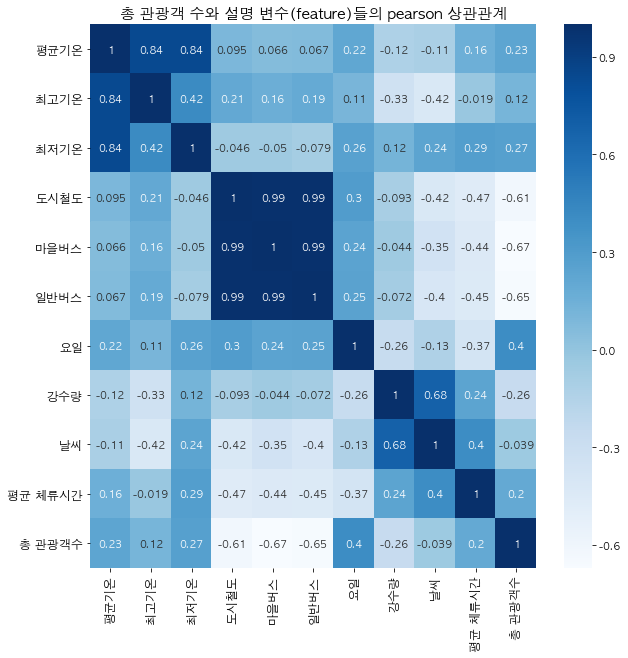

In [434]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("총 관광객 수와 설명 변수(feature)들의 pearson 상관관계", fontsize=15)
sns.heatmap(df.corr(method="pearson"), cmap="Blues", annot=True, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.tick_params(labelsize=12)

In [435]:
df.corr(method="spearman")

,평균기온,최고기온,최저기온,도시철도,마을버스,일반버스,요일,강수량,날씨,평균 체류시간,총 관광객수
평균기온,1.000000,0.841346,0.814393,0.211466,0.138539,0.105510,0.224882,-0.203961,-0.102972,0.219483,0.263441
최고기온,0.841346,1.000000,0.402583,0.207847,0.160149,0.204271,0.054635,-0.393457,-0.406227,0.043041,0.119121
최저기온,0.814393,0.402583,1.000000,0.072435,-0.027055,-0.148224,0.258585,0.111642,0.258009,0.410315,0.384087
도시철도,0.211466,0.207847,0.072435,1.000000,0.839915,0.746385,0.425640,-0.319910,-0.404370,-0.523926,-0.298776
마을버스,0.138539,0.160149,-0.027055,0.839915,1.000000,0.792747,0.275663,-0.319945,-0.404415,-0.473901,-0.334631
일반버스,0.105510,0.204271,-0.148224,0.746385,0.792747,1.000000,0.193493,-0.319910,-0.404370,-0.471845,-0.446051
요일,0.224882,0.054635,0.258585,0.425640,0.275663,0.193493,1.000000,-0.340826,-0.116709,-0.293629,0.379121
강수량,-0.203961,-0.393457,0.111642,-0.319910,-0.319945,-0.319910,-0.340826,1.000000,0.801307,0.352984,-0.149154
날씨,-0.102972,-0.406227,0.258009,-0.404370,-0.404415,-0.404370,-0.116709,0.801307,1.000000,0.430236,0.006419
평균 체류시간,0.219483,0.043041,0.410315,-0.523926,-0.473901,-0.471845,-0.293629,0.352984,0.430236,1.000000,0.360338


(11.0, 0.0)

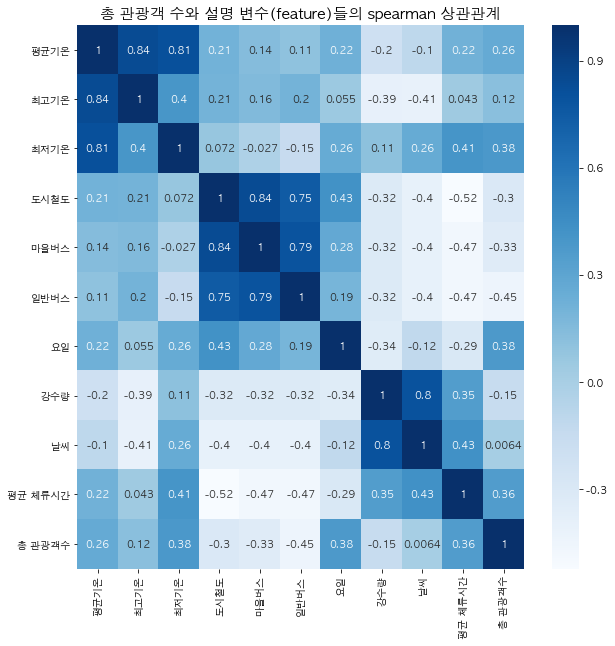

In [436]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("총 관광객 수와 설명 변수(feature)들의 spearman 상관관계", fontsize=15)
sns.heatmap(df.corr(method="spearman"), cmap="Blues", annot=True, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [485]:
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

In [491]:
corr_df = pd.DataFrame()

for col in df.columns.values[:-1]:
    pr, pp = stats.pearsonr(df[col], df["총 관광객수"])
#     print(f"** {col} **")
#     print("피어슨 r:", pr)
#     print("피어슨 p:", pp)
    
    sr, sp = stats.spearmanr(df[col], df["총 관광객수"])
#     print("스피어만 r:", sr)
#     print("스피어만 p:", sp)
    
    p_lo, p_hi = r_confidence_interval(pr, 0.95, 30)
#     print(f"스피어만 신뢰구간: {p_lo} ~ {p_hi}")
    
    s_lo, s_hi = r_confidence_interval(sr, 0.95, 30)
#     print(f"스피어만 신뢰구간: {s_lo} ~ {s_hi}")
#     print("\n")


    
#     corr_df = corr_df.append(pd.DataFrame({"feature":col, "pearson r":pr, "pearson p":pp, "spearman r":sr, "spearman p":sp}), ignore_index=True)
    corr_df = pd.concat([corr_df, pd.DataFrame([col, pr, pp, sr, sp, p_lo, p_hi, s_lo, s_hi])], axis=1, ignore_index=True)

In [492]:
corr_df = corr_df.T
corr_df.columns = ["설명 변수", "피어슨 r", "피어슨 p", "스피어만 r", "스피어만 p", "피어슨 신뢰구간 low", "피어슨 신뢰구간 high", "스피어만 신뢰구간 low", "스피어만 신뢰구간 high"]

In [493]:
corr_df

,설명 변수,피어슨 r,피어슨 p,스피어만 r,스피어만 p,피어슨 신뢰구간 low,피어슨 신뢰구간 high,스피어만 신뢰구간 low,스피어만 신뢰구간 high
0,평균기온,0.231361,0.218643,0.263441,0.159546,0.219908,0.242751,0.252175,0.274635
1,최고기온,0.115037,0.544962,0.119121,0.530682,0.103113,0.126928,0.107207,0.131
2,최저기온,0.274749,0.141733,0.384087,0.0361286,0.263556,0.285869,0.373752,0.394327
3,도시철도,-0.612524,0.000320848,-0.298776,0.108756,-0.620008,-0.604928,-0.309727,-0.287747
4,마을버스,-0.670797,4.978e-05,-0.334631,0.070687,-0.677381,-0.664105,-0.345304,-0.323872
5,일반버스,-0.652699,9.25934e-05,-0.446051,0.0134889,-0.659571,-0.645717,-0.455666,-0.436332
6,요일,0.400741,0.0281933,0.379121,0.038815,0.390562,0.410821,0.36874,0.389406
7,강수량,-0.259149,0.166708,-0.149154,0.431485,-0.270371,-0.247856,-0.160932,-0.137334
8,날씨,-0.0386373,0.839363,0.00641857,0.973146,-0.050681,-0.0265824,-0.00564921,0.0184845
9,평균 체류시간,0.200503,0.288066,0.360338,0.0504571,0.188893,0.212058,0.349792,0.370793


In [489]:
corr_s_df = corr_df.drop(["스피어만 r", "스피어만 p", "스피어만 신뢰구간 low", "스피어만 신뢰구간 high"], axis=1)
corr_s_df

,설명 변수,피어슨 r,피어슨 p,피어슨 신뢰구간 low,피어슨 신뢰구간 high
0,평균기온,0.231361,0.218643,0.219908,0.242751
1,최고기온,0.115037,0.544962,0.103113,0.126928
2,최저기온,0.274749,0.141733,0.263556,0.285869
3,도시철도,-0.612524,0.000320848,-0.620008,-0.604928
4,마을버스,-0.670797,4.978e-05,-0.677381,-0.664105
5,일반버스,-0.652699,9.25934e-05,-0.659571,-0.645717
6,요일,0.400741,0.0281933,0.390562,0.410821
7,강수량,-0.259149,0.166708,-0.270371,-0.247856
8,날씨,-0.0386373,0.839363,-0.050681,-0.0265824
9,평균 체류시간,0.200503,0.288066,0.188893,0.212058


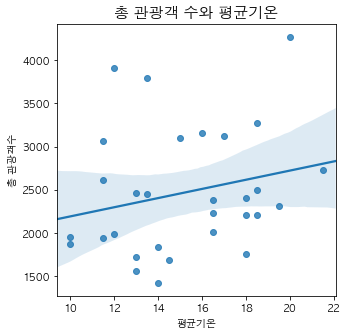

In [334]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("총 관광객 수와 평균기온", fontsize=15)
sns.regplot(x="평균기온", y="총 관광객수", data=df)

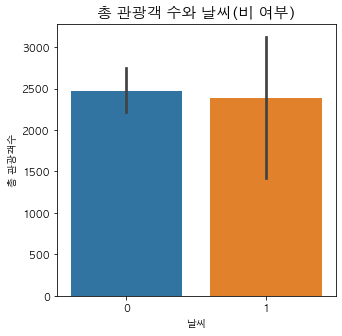

In [341]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("총 관광객 수와 날씨(비 여부)", fontsize=15)
sns.barplot(x="날씨", y="총 관광객수", data=df)

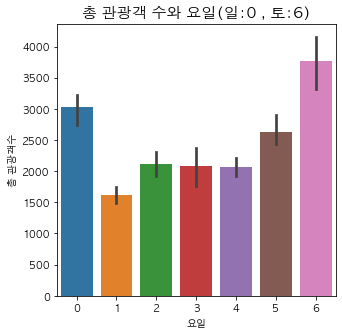

In [447]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("총 관광객 수와 요일(일:0 , 토:6)", fontsize=15)
sns.barplot(x="요일", y="총 관광객수", data=df)

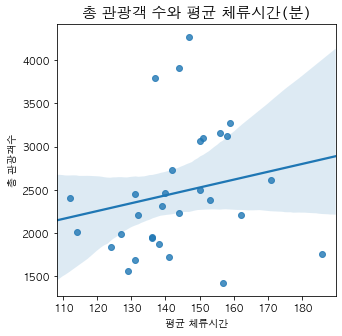

In [451]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("총 관광객 수와 평균 체류시간(분)", fontsize=15)
sns.regplot(x="평균 체류시간", y="총 관광객수", data=df)

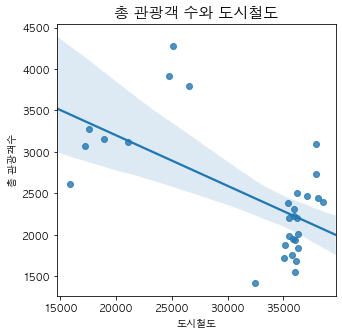

In [453]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("총 관광객 수와 도시철도", fontsize=15)
sns.regplot(x="도시철도", y="총 관광객수", data=df)

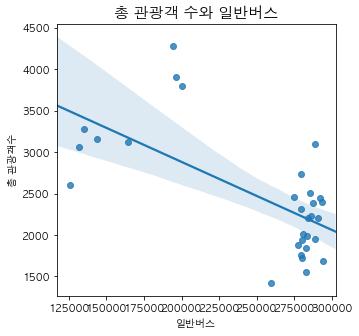

In [455]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("총 관광객 수와 일반버스", fontsize=15)
sns.regplot(x="일반버스", y="총 관광객수", data=df)

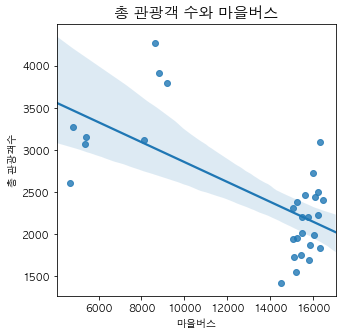

In [456]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("총 관광객 수와 마을버스", fontsize=15)
sns.regplot(x="마을버스", y="총 관광객수", data=df)